### MA3402 Estadística
## Tarea 3, Entrega 2: Regresiones Lineales

**Profesor:** Joaquín Fontbona T.

**Auxiliares:** Javier Maass, Francisco Muñoz y Diego Olguín.

# Objetivo

El objetivo de esta tarea es el de introducir el concepto de regresión lineal, revisar diferentes tests de hipótesis que se pueden hacer sobres este modelo, y comprobar los supuestos que se hacen en una regresión lineal simple. Además, se explicarán algoritmos para escoger las variables significativas y mantener un modelo simple.

# Introducción a las Regresiones Lineales

Las regresiones lineales son una técnica fundamental en el campo de la estadística y el análisis de datos que se utiliza para modelar la relación entre una variable dependiente y una o más variables independientes. En esencia, la regresión lineal busca establecer una relación matemática que permita predecir o explicar la variable dependiente en función de las variables independientes. Esta relación se representa en forma de una línea recta, de ahí su nombre.

La forma más común de la regresión lineal es la regresión lineal simple, que se utiliza cuando solo hay una variable independiente. La fórmula general de una regresión lineal simple se expresa de la siguiente manera:

$$
\begin{aligned}
Y 
&= \beta_0 + \beta_1 X_1 + \ldots  + \beta_m X_m  + \varepsilon \\
&= \sum_{i=0}^{m} \beta_i X_i  + \varepsilon
\end{aligned}
$$

Donde:
- $$ Y $$ es la variable dependiente que queremos predecir.
- $$ X = (1, X_1, \ldots, X_m)^{\top} $$ es la variable independiente (asumiendo $$X_0=1$$).
- $$ \beta = (\beta_0, \beta_1, \ldots, \beta_m)^{\top} $$ son los parámetros del modelo.
- $$ \beta_0 $$ es la intersección en el eje Y (también llamada constante) que representa el valor estimado de $$ Y $$ cuando $$ X $$ es igual a cero.
- $$ \varepsilon $$ es el término de error, también llamado residuo, que captura la variabilidad no explicada por el modelo.

El objetivo principal de una regresión lineal es estimar los valores de $$ \beta $$ de manera que el modelo se ajuste de la mejor manera posible a los datos observados. Una vez que se obtienen estos coeficientes, se puede utilizar el modelo para hacer predicciones y entender la relación entre las variables. En resumen, las regresiones lineales son una herramienta esencial en la estadística y el análisis de datos para comprender y predecir relaciones entre variables.



# Importación de librerías y funciones útiles

Importaremos algunas librerías útiles que utilizaremos en el notebook. En las siguientes celdas encontrará el código necesario para instalar las librerías que utilizaremos.

In [ ]:
# Instalar la versión necesaria de sklearn para la tarea

try:
    # Verificar que sklearn está instalado
    import sklearn
    print("Sklearn installed")

    # Verificar que la versión sea menor a 1.2
    from packaging import version
    print(f"Version of sklearn: {sklearn.__version__}")
    assert version.parse(sklearn.__version__) < version.parse("1.2")

except:
    print("Installing sklearn...")
    !pip install --upgrade pip
    !python -m pip install --force-reinstall "scikit-learn<1.2"
    print("\nHay que reiniciar el notebook!!!!")

'1.1.2'

In [ ]:
try:
    import statsmodels
    print("statsmodels installed")
    
except:
    print("installing statsmodels...")
    !pip install --upgrade pip
    !python -m pip install statsmodels
    print("\nHay que reiniciar el notebook!!!!")

installing statsmodels...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 38.1 MB/s eta 0:00:00


In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson

# Semilla para hacer resultados replicables
np.random.seed(seed=42)

# Para tener gráficos bonitos
sns.set_theme(
    context="notebook", 
    style="darkgrid", 
)

Obtenemos los datos, especificando la variable dependiente y las variables independientes.

In [ ]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MEDV"] = data.target

X = df.drop("MEDV", 1)
y = df["MEDV"]
df.head()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Se puede obtener la documentación del conjunto de datos y de las variables a través del campo `DESCR`.

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Realizamos un gráfico de la matriz de correlaciones a través de la función `corr_matrix`. Recuerde que la correlación entre dos variables queda definida por el [coeficiente de correlación de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
$$
\rho_{X, Y} = \frac{\mathrm{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$
En la entrada de Wikipedia se explican más detalles de este coeficiente. Pero a grandes rasgos, si tiene un coeficiente cercano a 1, significa que se encuentran correlacionadas (si una variable sube, usuamente la otra también) y si tiene un coeficiente cercano a -1, están anticorrelacionadas (si una variable sube, usualmente la otra baja).

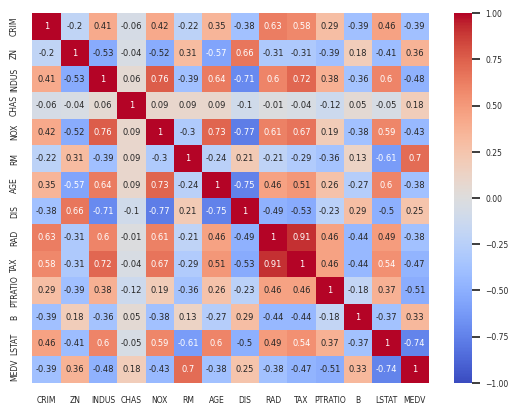

In [ ]:
def corr_matrix(df, context="notebook", font_scale=0.5, cmap="coolwarm"):
    correlation_matrix = df.corr().round(2)
    # annot = True to print the values inside the square
    with sns.plotting_context(context, font_scale=font_scale):
        sns.heatmap(
            data=correlation_matrix, 
            annot=True, 
            cmap=cmap,
            vmin=-1, vmax=1,
        )

corr_matrix(df)

Y también generamos un gráfico *Pair plot*. En este se encuentran los gráficos de dispersión por cada par de variables que se tienen en el dataset (o al menos, de los especificados). Resulta muy útil para observar los patrones entre variables.

En la siguiente celda, se grafican las dos primeras variables que más correlación tuvieron con la variable objetivo `MEDV`.

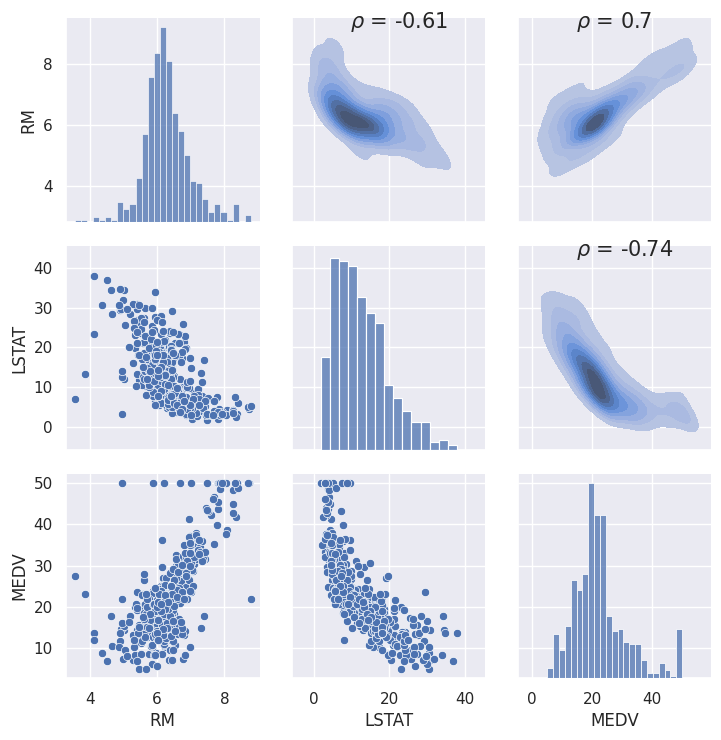

In [ ]:
def pairplot(df, vars=None):
    def corr(x, y, **kwargs):
        coef = np.corrcoef(x, y)[0][1]
        label = r"$\rho$ = " + str(round(coef, 2))

        ax = plt.gca()
        ax.annotate(label, xy=(0.3, 0.95), size=15, xycoords=ax.transAxes)

    grid = sns.PairGrid(df, vars=vars)

    grid = grid.map_lower(sns.scatterplot)

    grid = grid.map_diag(sns.histplot)

    grid = grid.map_upper(corr)
    grid = grid.map_upper(sns.kdeplot, fill=True)
    

pairplot(df, ["RM", "LSTAT", "MEDV"])

In [ ]:
# El gráfico de todas las variables se demora un poco más
# pairplot(df)

Por último, para realizar ejemplos en las siguientes secciones, se creará un dataset de juguete, que tiene por solución la siguiente fórmula:
$$
\begin{aligned}
Y &= 5 + 0.3 \cdot X_1 + 0.7 \cdot X_2 + \varepsilon\\
\varepsilon &\sim \mathcal N(0, 0.2^2)
\end{aligned}
$$
Este dataset también nos ayudará a determinar qué es lo que debe de pasar "en teoría".

,X1,X2,y
0,3.745401,3.425665,8.345989
1,9.507143,5.209505,11.333420
2,7.319939,6.864729,11.955996
3,5.986585,6.161124,11.182236
4,1.560186,6.532806,10.223737


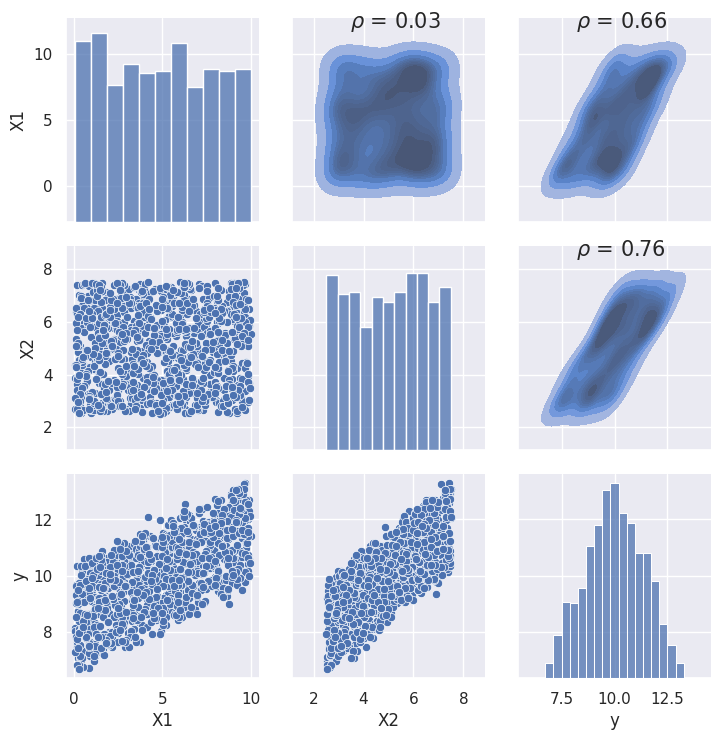

In [ ]:
X1_toy = 10 * np.random.random(1000)
X2_toy = 5 * np.random.random(1000) + 2.5
y_toy = 5 + 0.3 * X1_toy + 0.7 * X2_toy + np.random.randn(1000) * 0.2
df_toy = pd.DataFrame({"X1": X1_toy, "X2": X2_toy, "y": y_toy})


X_toy = df_toy.drop("y", 1)
y_toy = df_toy["y"]

pairplot(df_toy)
df_toy.head()

# Mi primera regresión lineal

En esta sección se le pedirá realizar 3 regresiones lineales:

1. El primer modelo es utilizando la variable `RM`, que corresponde a modelar la siguiente fórmula:
$$
\begin{aligned}
Y_{MEDV} &= \beta_0 + \beta_{RM} X_{RM} + \varepsilon\\
\varepsilon &\sim \mathcal N(0, \sigma_1^2)
\end{aligned}
$$
2. El segundo modelo es utilizando la variable `LSTAT`, que corresponde a modelar la siguiente fórmula:
$$
\begin{aligned}
Y_{MEDV} &= \beta_0 + \beta_{LSTAT} X_{LSTAT} + \varepsilon\\
\varepsilon &\sim \mathcal N(0, \sigma_2^2)
\end{aligned}
$$
3. El último modelo se realiza utilizando todas las variables involucradas. Esto se resume en la siguiente fórmula:
$$
\begin{aligned}
Y_{MEDV} &= \beta_0 + \sum_{v \text{ variable}}\beta_{} X_{v} + \varepsilon\\
\varepsilon &\sim \mathcal N(0, \sigma_3^2)v
\end{aligned}
$$

Puede inspirarse y utilizar el ejemplo de la siguiente celda.

In [ ]:
model_toy = smf.ols(
    formula="y ~ X1 + X2",
    data=df_toy,
).fit()

In [ ]:
# Respuestas

Realice dos gráficos para los dos primeros modelos (es decir, el modelo que utiliza la variable `RM` y el modelo que utiliza la variable `LSTAT`), en donde se muestre la variable dependiente, la variable independiente, y la recta que representa la predicción. Puede utilizar el ejemplo de la celda siguiente:

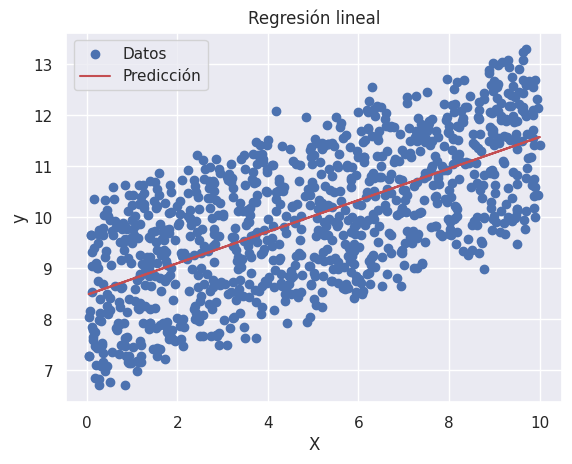

In [ ]:
#### SÓLO PARA HACER UNA REGRESIÓN DE UNA VARIABLE ####
model_toy_ = smf.ols(
    formula="y ~ X1",
    data=df_toy,
).fit()
#### SÓLO PARA HACER UNA REGRESIÓN DE UNA VARIABLE ####

plt.scatter(X1_toy, y_toy, c="b", label="Datos")
plt.plot(X1_toy, model_toy_.predict(df_toy.X1).array, "r", label="Predicción")

plt.legend()
plt.title("Regresión lineal")
plt.xlabel("X")
plt.ylabel("y")


plt.show()

In [ ]:
# Respuesta

**¿Se ajusta la recta a los datos para el primer modelo? ¿Y para el segundo modelo?**
*Respuesta:* Soy una respuesta!

# Comprobación de supuestos

En el modelo de la regresión lineal se realizan varios supuestos acerca de las variables dependientes, las variables independientes y su relación entre ellas. Usualmente, la comprobación de los supuestos se realiza con el fin de saber qué tan razonable es hacer la regresión lineal, puesto que siempre se puede hacer una regresión lineal a datos que parecen tener otro tipo de comportamiento (por ejemplo, realizar una regresión lineal a variables que tienen un comportamiento cuadrático).

Algunos de los supuestos que revisaremos serán los siguientes:
1. Linearidad
2. Independencia
3. Normalidad
4. Igual varianza

## Linearidad

Como su nombre lo dice, este supuesto asume que la relación entre las variables independientes y dependientes deben ser lineal. Esto significa que los cambios en la variable dependiente son proporcionales a los cambios en las variables independientes.

Este supuesto se puede comprobar analizando el gráfico de los residuos del modelo, recordando que los residuos son:
$$
\varepsilon_i = y_i - \sum_{j=0}^{m} \hat\beta_j x_{ij}
$$
Y comprobar que $$\mathbb E[\varepsilon_i] = 0$$. A continuación se proporciona una función que realiza un gráfico de los residuos y se realiza el ejemplo con el dataset de juguete.

In [ ]:
def resid_plot(df, x, y):
    sns.residplot(
        data=df, 
        x=x, 
        y=y, 
        lowess=True, 
        line_kws={"color": "red", "lw": 1, "alpha": 1}
    )

    plt.xlabel("Fitted values")
    plt.title('Residual plot')
    plt.show()

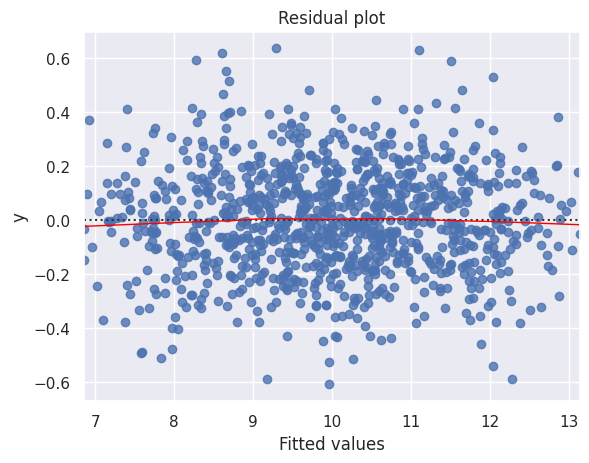

In [ ]:
resid_plot(df_toy, model_toy.predict(X_toy).array, "y")

Lo que se busca en este gráfico es que la línea roja sea lo más cercano a 0, y que sea lo más plano a lo largo del valor teórico.

**Realice los gráficos de residuos para los tres modelos anteriores.**

In [ ]:
# Respuestas

**Comente acerca de los tres gráficos realizados. ¿Los datos parecen tener un comportamiento lineal? ¿Cuáles sí y cuales no?**
*Respuesta:* Soy una respuesta!

---
**Para aquellos que comente que no tiene un comportamiento lineal ¿por qué cree que sucede esto?**
*Respuesta:* Soy una respuesta!

## Independencia

La independencia o incorrelación se refiere a que los errores (residuos) del modelo deben ser independientes entre sí. Esto implica que el valor de error para una observación no debe predecir o influir en el valor del error para otra observación.

Se puede realizar el test de Durbin Watson para detectar la presencia de autocorrelación en los residuos. En este test se plantea la siguiente hipótesis:
$$
\begin{aligned}
H_0 &: \text{ No existe correlación entre los residuos} \\
H_A &: \text{ Los residuos están correlacionados} \\
\end{aligned}
$$

El test estadístico es aproximadamente igual a $2 ( 1- r)$ donde $r$ es la autocorrelación muestral de los residuos. Por tanto, el test estadístico siempre estará entre 0 y 4 con la siguiente interpretación:
* Si se encuentra cerca de 2 indica que no hay correlación entre residuos.
* Cuanto más cerca de 0 estén las estadísticas de la prueba, mayor será la evidencia de correlación positiva.
* Cuanto más cerca de 4 estén las estadísticas de la prueba, mayor será la evidencia de correlación negativa.

La *rule of thumb* de este test, es que si los valores del estadístico se encuentra entre 1.5 y 2.5, entonces se puede considerar que no hay correlación entre los residuos.

En la siguiente celda de código se puede ver un ejemplo en el que se realiza este test sobre el modelo de juguete.

In [ ]:
durbin_watson(model_toy.resid)

2.0451301843467977

En la ejecución de mi notebook, este valor resultó ser $2.05$ (podría variar en otras ejecuciones). Como este valor se encuentra entre 1.5 y 2.5, se considera que los residuos no están autocorrelacionados, y por tanto, existe independencia.

**Realice este test sobre los tres modelos mencionados.**

In [ ]:
# Respuestas

**¿Qué puede concluir acerca de los tests realizados?**
*Respuesta:* Soy una respuesta!

## Normalidad

La normalidad se refiere a que los errores (o residuos) del modelo deben seguir una distribución normal. Este supuesto proviene de la fórmula, pues se asume que $\varepsilon \sim \mathcal N(0, \sigma^2)$. Este supuesto facilita las inferencias estadísticas y la construcción de intervalos de confianza.

Esto se puede comprobar a través de un Q-Q plot. A continuación se realiza este gráfico sobre el dataset de juguete.

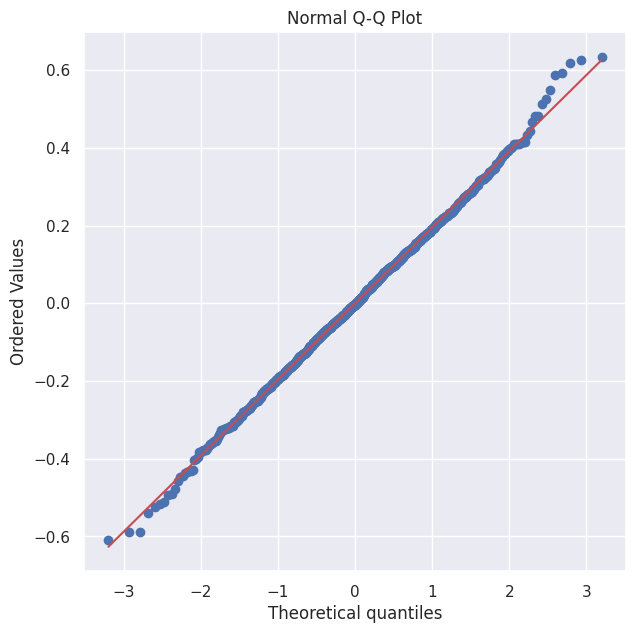

In [ ]:
resid = model_toy.resid

plt.figure(figsize=(7, 7))
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

plt.show()

Lo que se busca en este gráfico es que la distribución de puntos se encuentre lo más cercano a la línea roja.

**Realice este gráfico sobre los otros tres modelos.**

In [ ]:
# Respuestas

**¿Qué puede concluir a partir de los gráficos realizados? ¿Existe normalidad en los residuos?**
*Respuesta:* Soy una respuesta!

## Igual varianza (Homocedasticidad)

La variabilidad de los errores debe ser constante en todos los niveles de las variables independientes. En otras palabras, la dispersión de los residuos debe ser constante a lo largo de la línea de regresión.

Este supuesto se puede comprobar a través de un gráfico scale-loc. A continuación se proporciona una función para realizar este gráfico, y un ejemplo de uso con el dataset de juguete.

In [ ]:
def scale_loc_plot(model, predictions):
    abs_sqrt_resid = np.sqrt(np.abs(model.resid))

    plt.figure(figsize=(7, 7))
    sns.regplot(
        x=predictions, y=abs_sqrt_resid,
        scatter=True,
        lowess=True,
        line_kws={"color": "red", "lw":1, "alpha": 0.8}
    )
    plt.ylabel("Standarized residuals")
    plt.xlabel("Fitted value")
    plt.show()

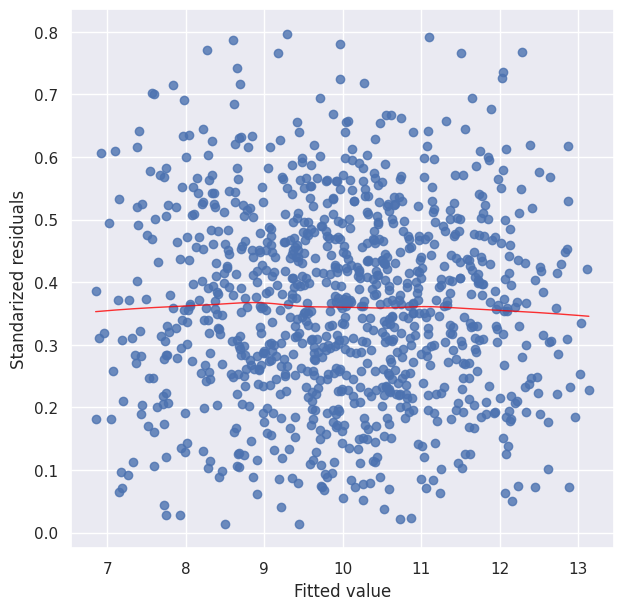

In [ ]:
scale_loc_plot(model_toy, model_toy.predict(X_toy).array)

El resultado esperado por este gráfico es que la línea roja se mantenga constante.

**Realice este gráfico en los tres modelos anteriores**

In [ ]:
# Respuestas

# Selección de variables

La selección de variables en la regresión lineal es un proceso crucial para construir modelos efectivos y evitar la inclusión de variables irrelevantes o redundantes. Antes de revisar algunas técnicas de selección de variables, revisemos (y recordemos) algunos tests de hipótesis e indicadores que se pueden realizar y obtener sobre el modelo.

A través del método `summary` de algún modelo de regresión lineal, se puede obtener un resumen de los indicadores más relevantes de una regresión lineal. Revisemos esto con el ejemplo de juguete.

In [ ]:
print(model_toy.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.426e+04
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:25:09   Log-Likelihood:                 213.14
No. Observations:                1000   AIC:                            -420.3
Df Residuals:                     997   BIC:                            -405.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0065      0.024    206.149      0.0

A continuación se adjunta el resumen de la regresión:
```
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.426e+04
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:25:09   Log-Likelihood:                 213.14
No. Observations:                1000   AIC:                            -420.3
Df Residuals:                     997   BIC:                            -405.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0065      0.024    206.149      0.000       4.959       5.054
X1             0.2993      0.002    141.085      0.000       0.295       0.303
X2             0.6999      0.004    164.970      0.000       0.692       0.708
==============================================================================
Omnibus:                        1.143   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                1.027
Skew:                           0.021   Prob(JB):                        0.598
Kurtosis:                       3.151   Cond. No.                         29.7
==============================================================================
```

A partir de este resumen podemos observar algunos indicadores interesantes:
* `R-squared`: Es el coeficiente de determinación $R^2$. Es una medida que evalúa la proporción de la variabilidad en la variable dependiente que es explicada por el modelo de regresión. $R^2$ varía entre 0 y 1, donde $R^2 = 0$ indica que el modelo no explica nada de la variabilidad, mientras que $R^2 = 1$ indica que el modelo explica toda la variabilidad. Por tanto, un valor cercano a 1 es lo ideal.
* `AIC`: Es el criterio de información de Akaike. Es una medida utilizada para comparar la calidad relativa de diferentes modelos estadísticos. El AIC penaliza modelos más complejos, favoreciendo aquellos que logran un buen ajuste sin utilizar un número excesivo de variables. Lo que se busca es obtener el modelo con menor AIC.
* `F-statistic` y `Prob (F-statistic)`: Correspondiente al valor del estadístico y al p-value del F-test. Este test corresponde al test ANOVA, y en este contexto se utiliza este test para evaluar la significancia global del modelo, es decir, si al menos una de las variables independientes contribuye de manera significativa a explicar la variabilidad en la variable dependiente.
* Los valores `t` y `P>|t|`: Corresponden al valor del estadístico y del p-value del t-test. Se utiliza para determinar si la contribución de una variable independiente específica al modelo es significativa.
* `Durbin-Watson`: Corresponde al valor del estadístico del test de Durbin-Watson. Este estadístico lo revisamos anteriormente, pero viene integrado en el resumen de la regresión lineal.

Obviamente, todos los indicadores presentados en el resumen son importantes a tener en consideración al ajustar un modelo de regresión lineal, pero estos son los valores que utilizaremos por ahora.

Se describirá dos algoritmos de selección de variables de stepwise: *forward selection* y *backward elimination*.

## Forward Selection

Este método consiste en empezar con un modelo vacío, y agregar una a una variables independientes que sean significativas para el modelo. El algoritmo termina cuando se alcanza algún criterio de detención (en nuestro caso, si el AIC aumenta).

Este algoritmo se describe a continuación:
```
1. Inicializar un modelo vacío: Y = β₀ + ε
2. Repetir hasta que se cumpla un criterio de parada:
   a. Para cada variable no incluida en el modelo actual:
      i. Ajustar el modelo agregando la variable al modelo actual.
      ii. Evaluar el rendimiento del modelo (en nuestro caso, el p-value del t-test).
   b. Seleccionar la variable que mejora más significativamente el rendimiento del modelo.
   c. Agregar la variable seleccionada al modelo actual.
3. Finalizar cuando se cumpla el criterio de parada (en nuestro caso, si el AIC aumenta).
```


**Realice un historial de modelos "a mano" utilizando este algoritmo, es decir, por cada mejora registre el modelo.**

Genere las celdas de código que sean necesarias. Se proporciona la primera iteración de este algoritmo.

In [ ]:
formula = "MEDV ~ 1"
variables = set(df.columns[:-1])

model_forward_0 = smf.ols(
    formula=formula,
    data=df,
).fit()
print(model_forward_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 10 Nov 2023   Prob (F-statistic):                nan
Time:                        02:35:40   Log-Likelihood:                -1840.2
No. Observations:                 506   AIC:                             3682.
Df Residuals:                     505   BIC:                             3687.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.409     55.111      0.0

In [ ]:
pvalues = dict()
for var in variables:
    model_ = smf.ols(
        formula=formula + f" + {var}",
        data=df,
    ).fit()
    pvalues[var] = model_.pvalues[var]

best_value = min(pvalues, key=pvalues.get)
print(f"{best_value = }")
variables -= {best_value}
print(f"{variables = }")
formula += f" + {best_value}"
print(f"{formula = }")

model_ = model_forward_1 = smf.ols(
    formula=formula,
    data=df,
).fit()
print(model_.summary())

best_value = 'LSTAT'
variables = {'ZN', 'TAX', 'DIS', 'B', 'PTRATIO', 'CHAS', 'NOX', 'INDUS', 'RAD', 'CRIM', 'RM', 'AGE'}
formula = 'MEDV ~ 1 + LSTAT'
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           5.08e-88
Time:                        02:35:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     

In [ ]:
# Mucho código

**Comente acerca de la evolución del valor de $R^2$. ¿Mejoran los modelos a medida que aumentan el número de variables?**
*Respuesta*: Soy una respuesta!

---
**¿Cuál variable cree usted que es la más significativa para el modelo escogido?**
*Respuesta*: Soy una respuesta!

---
**¿La escala de las variables afecta en esta decisión? si es así, ¿Cómo arreglaría este problema?**
*Respuesta*: Soy una respuesta!

## Backward Elimination

Este algoritmo se puede considerar como el opuesto del anterior. En vez de empezar con un modelo simple, que se empieza a complejizar más y más, se empieza con el modelo que contiene todas las variables, y se empiezan a eliminar las variables menos significativas.

El algoritmo de *backward elimination* se explica como sigue:
```
1. Inicializar un modelo con todas las variables: Y = β₀ + β₁X₁ + β₂X₂ + ... + β_pX_p + ε
2. Repetir hasta que se cumpla un criterio de parada:
   a. Evaluar el rendimiento del modelo actual.
   b. Eliminar la variable menos significativa según algún criterio (en nuestro caso, el valor p más alto).
   c. Actualizar el modelo sin la variable eliminada.
3. Finalizar cuando se cumpla el criterio de parada (en nuestro caso, si el AIC sube).
```

**Al igual que en el caso anterior, implemente este algoritmo "a mano"**.

*Hint*: Puede utilizar el método `idxmax` sobre el campo `pvalues` de un modelo para obtener la variable con mayor p-value.

In [ ]:
# Mucho código

**¿Que variable se seleccionaron y no se seleccionaron en comparación con el método anterior?**
*Respuesta*: Soy una respuesta!

---
**¿Qué algoritmo entregó un mejor modelo? ¿Bajo cuál criterio puede argumentar esto?**
*Respuesta*: Soy una respuesta!

---
**En relación a las variables que seleccionaron los algoritmos ¿Existe algún tipo de sesgo en estas variables? ¿Cómo afectaría a las decisiones tomadas al utilizar estos modelos? (*Hint*: revise la documentación del dataset)**
*Respuesta*: Soy una respuesta!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=05da59f1-7b9f-4970-8d32-7a5e3b8b8a3d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>